Interactivity and engaging visuals are key to convey data stories, insights and model results. Compiling these into a notebook or a web app represents the ideal way forward on how business and data scientists/analysts should present and interact with AI/ML outcomes. Shapash takes a step in that direction. It is a Python library built by data scientists of a French insurer, MAIF. This package compiles various visualizations around SHAP/Lime explainability and publishes an easy to use interactive dashboard as a web app.

It uses Shap or Lime backend to compute contributions. **Shapash** relies on the different steps necessary to build a ML model to make the results understandable.


![N|Solid](https://miro.medium.com/max/1400/0*IREnNqlYZq3hsDtM.png)


# Import libraries

In [ ]:
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
# Built-in libraries
import math
import numpy    as np
import pandas   as pd


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn           as sns

# Sklearn libraries
#
from sklearn                 import metrics
from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets        import load_breast_cancer

# Parameters

In [ ]:
test_size = 0.1

# Import data

**Breast cancer wisconsin (diagnostic) dataset**
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign




This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.


**References**

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Loading data

In [ ]:
# Load Breast Cancer dataset
data = load_breast_cancer() 

# Create DataFrame
#
df   = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column
#
df['class'] = data.target


# Show DataFrame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## Pre-processing data

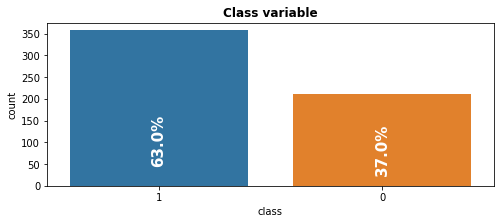

In [ ]:
fig = plt.figure(figsize=(8,3))
ax  = sns.countplot(df['class'], order = df['class'].value_counts().index)

#Create annotate
for i in ax.patches:
    ax.text(x        = i.get_x() + i.get_width()/2, 
            y        = i.get_height()/7, 
            s        = f"{np.round(i.get_height()/len(df)*100)}%", 
            ha       = 'center', 
            size     = 15, 
            weight   = 'bold', 
            rotation = 90, 
            color    = 'white');
    

plt.title("Class variable", size=12, weight='bold');

### Training/Testing sets

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=42) 

# Model development

# Setup ML model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost model
#
model = GradientBoostingClassifier( random_state  = 42 )

## Training ML model

In [ ]:
model.fit(trainX, trainY);

## Get Predictions


In [ ]:
# Calculate prediction
#
pred = model.predict( testX )

# Performance accuracy
#
accuracy = metrics.accuracy_score(testY, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


# Shapash

In [ ]:
%%capture
! pip install shap

In [ ]:
%%capture
! pip install shapash

In [ ]:
import time 

import shapash
import shap
# import datatable as dt # data table factory
from sklearn.metrics                   import f1_score
from sklearn.metrics                   import confusion_matrix
from sklearn.metrics                   import accuracy_score
from shapash.utils.load_smartpredictor import load_smartpredictor
from shapash.explainer.smart_explainer import SmartExplainer

## Create explainer

In [ ]:
# create explainer
xpl = SmartExplainer()

xpl.compile(x     = testX,
            model = model)

Backend: Shap TreeExplainer


## Creating Application

In [ ]:
# Creating Application
#
app = xpl.run_app(title_story='Breast Cancer');

Dash is running on http://0.0.0.0:8050/



INFO:root:Your Shapash application run on http://b36bb6644f06:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.


Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production


## Explainability/Visualizations 

### Feature importance based on SHAP

In [ ]:
# Feature importance based on SHAP
#
xpl.plot.features_importance();

   Use a production WSGI server instead.
 * Debug mode: off


Exception in thread Thread-15:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.7/dist-packages/shapash/utils/threading.py", line 29, in __run
    self.__run_backup()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/shapash/explainer/smart_explainer.py", line 1007, in <lambda>
    target=lambda: self.smartapp.app.run_server(debug=False, host=host, port=port))
  File "/usr/local/lib/python3.7/dist-packages/dash/dash.py", line 1716, in run_server
    self.server.run(host=host, port=port, debug=debug, **flask_run_options)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 990, in run
    run_simple(host, port, self, **options)
  File "/usr/local/lib/python3.7/dist-packages/werkzeug/serving.py", line 1052, in run_simple
    inner()
  File "/usr/local/lib/python3.7/dist-p

### Contributions plot

In [ ]:
# Contributions plot
#
xpl.plot.contribution_plot("worst concave points")


### Local explanation (Compare plots)

In [ ]:
# compare plot 
xpl.plot.compare_plot(index=[testX.index[0], 
                             testX.index[5], 
                             testX.index[10],
                             testX.index[20]])


## Interactive interactions widget 

In [ ]:
# Interactive interactions widget 
#
xpl.plot.top_interactions_plot(nb_top_interactions = 5)